# Solve and implement  k-means algorithm for the given data set 3. Compare it with divisive clustering

## K-means approach



In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
#data given
data=np.array([[1,1],[1,2],[2,2],[6,2],[7,2],[6,6],[7,6]])

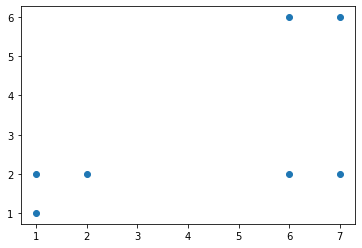

In [3]:
plt.scatter(data[:,0],data[:,1], label='True Position')

In [4]:
#buiding the model
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
print("centroid co-ordinates=",kmeans.cluster_centers_)

centroid co-ordinates= [[1.33333333 1.66666667]
 [6.5        6.        ]
 [6.5        2.        ]]


In [ ]:
np.array([[1.33333333,1.66666667],[6.5,6],[6.5,2]])

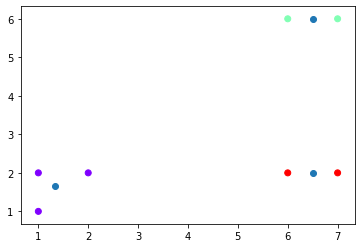

In [6]:
#plotting the centroid of the clusters
center=kmeans.cluster_centers_
plt.scatter(center[:,0],center[:,1])
plt.scatter(data[:,0],data[:,1], c=kmeans.labels_, cmap='rainbow')

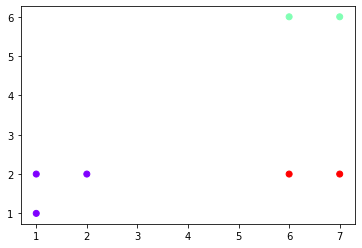

In [7]:
plt.scatter(data[:,0],data[:,1], c=kmeans.labels_, cmap='rainbow')

In [11]:
#predicting a data sample
a=np.array([[3,4],[6,4]])
kmeans.predict(a)

array([0, 1], dtype=int32)

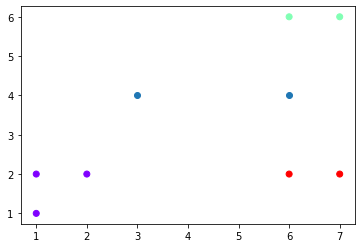

In [12]:
plt.scatter(data[:,0],data[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(a[:,0],a[:,1])

# Hierarchical clustering

Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering, Divisive and Agglomerative.

## Agglomerative approach

in this approach we take bottom up approch where the datas are considered to itself as a unique class. after certain iterations these data points will be merged with each other to form a cluster and the clustering process is stoped at a optimal value of 'k' clusters.


## Dendograms

Dendograms is a graph that is used to reperesent the allocation of data in a cluster 

<div align="center"><h2> Flowchart of Agglomerative approach </h2></div>

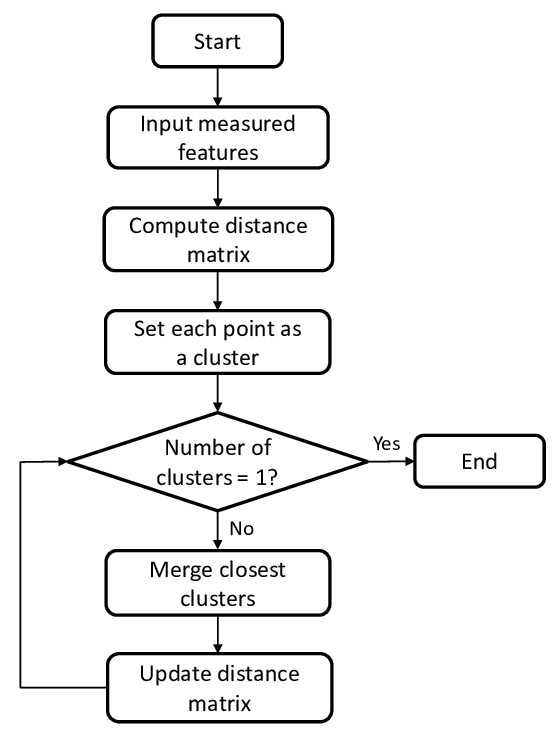

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [55.0, 55.0, 65.0, 65.0],
  [32.5, 32.5, 60.0, 60.0],
  [10.0, 10.0, 46.25, 46.25]],
 'dcoord': [[0.0, 1.0, 1.0, 0.0],
  [0.0, 1.0, 1.0, 0.0],
  [0.0, 1.0, 1.0, 1.0],
  [0.0, 1.0, 1.0, 0.0],
  [1.0, 4.0, 4.0, 1.0],
  [1.0, 4.0, 4.0, 4.0]],
 'ivl': ['5', '6', '2', '0', '1', '3', '4'],
 'leaves': [5, 6, 2, 0, 1, 3, 4],
 'color_list': ['g', 'r', 'r', 'c', 'b', 'b']}

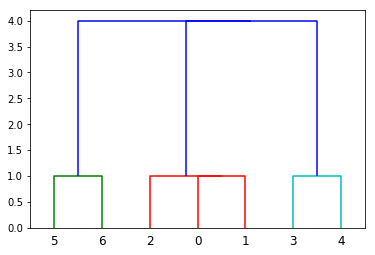

In [18]:
import scipy.cluster.hierarchy as ch
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import AgglomerativeClustering


data=np.array([[1,1],[1,2],[2,2],[6,2],[7,2],[6,6],[7,6]])

ch.dendrogram(ch.linkage(data,method='single'))

[2 2 2 1 1 0 0]


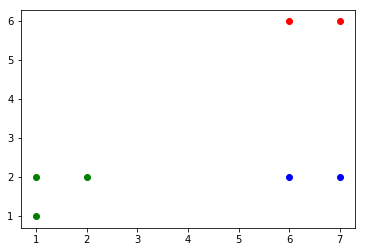

In [19]:
mod=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='single')
mod.fit(data)
labels=mod.labels_
print(labels)
plt.scatter(data[labels==0,0],data[labels==0,1],color='red')
plt.scatter(data[labels==1,0],data[labels==1,1],color='blue')
plt.scatter(data[labels==2,0],data[labels==2,1],color='green')

# Divisive approch

in this approch of herarcichal clusteriing technique we consider the given data to be a single cluster and then we divide the cluster till we reach the optimum number of clusters

In [3]:
def divisive(clu):
    data=np.array([[1,1],[1,2],[2,2],[6,2],[7,2],[6,6],[7,6]])

    def ecludian(x1,y1,x2,y2):
        return(((x1-x2)**2+(y1-y2)**2)**(1/2))

    kmeans = KMeans(n_clusters=clu)
    kmeans.fit(data)

    dist=[]

    center=kmeans.cluster_centers_

    for j in range(len(kmeans.labels_)):
        
        dist.append(ecludian(center[kmeans.labels_[j]][0],center[kmeans.labels_[j]][1],data[j][0],data[j][1]))
    print("#==============================================================#")
    print("distance from respective centroid to the data point:\n",dist)

    print((sum(dist))/len(dist)) 
    c1=(sum(dist))/len(dist)
    err=0
    for i in dist:
        err+=c1-i
    print("error for "+str(clu)+" number of clusters=",err/len(dist))

for i in range(1,7):
    divisive(i)

#==============================================================#
distance from respective centroid to the data point:
 [3.84654629081036, 3.434518651477516, 2.4948927423675684, 1.9846348556356865, 2.89263667590237, 3.4552533206993785, 4.0456577881446565]
3.1648771892910763
error for 1 number of clusters= -2.5376526277146434e-16
#==============================================================#
distance from respective centroid to the data point:
 [0.7453559924999298, 0.47140452079103146, 0.7453559924999301, 2.0615528128088303, 2.0615528128088303, 2.0615528128088303, 2.0615528128088303]
1.4583325367180304
error for 2 number of clusters= 6.344131569286608e-17
#==============================================================#
distance from respective centroid to the data point:
 [0.7453559924999298, 0.47140452079103146, 0.7453559924999301, 0.5, 0.5, 0.5, 0.5]
0.5660166436844131
error for 3 number of clusters= 1.586032892321652e-17
#=============================================================

## K-means with custom random dataset

In [7]:
# generate random integer values
from random import seed
from random import randint
import numpy as np
seed(3)
samp_data=np.array([[1,2]])
# generate some integers
for _ in range(30):
    value1 = randint(0, 10)
    value2 = randint(0, 10)
    temp=np.array([[value1,value2]])
    samp_data=np.concatenate((samp_data,temp))
samp_data=np.delete(samp_data,0,0)

    
print(samp_data)

[[ 3  9]
 [ 8  2]
 [ 5  9]
 [ 7 10]
 [ 9  1]
 [ 9  0]
 [ 7  4]
 [ 8  3]
 [ 3  7]
 [ 8  8]
 [ 7  6]
 [10  2]
 [ 3 10]
 [ 2  8]
 [ 6  0]
 [10  1]
 [ 2  9]
 [ 0  4]
 [ 0  4]
 [ 7  9]
 [ 6  6]
 [ 6  9]
 [ 7  2]
 [ 5  1]
 [ 0  2]
 [ 7  3]
 [ 4 10]
 [ 6 10]
 [ 4  6]
 [ 8  6]]


In [8]:
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt  

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
X=samp_data  
for k in K: 
 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 


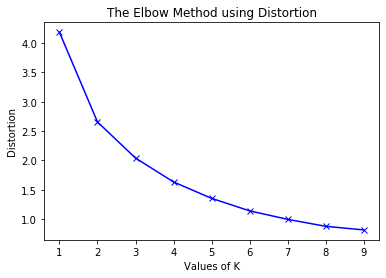

In [9]:

plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 


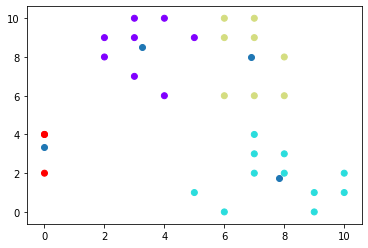

In [11]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(samp_data)
center=kmeans.cluster_centers_
plt.scatter(center[:,0],center[:,1])
plt.scatter(samp_data[:,0],samp_data[:,1], c=kmeans.labels_, cmap='rainbow')

## herarichical clustering with custom dataset

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [95.0, 95.0, 112.5, 112.5],
  [85.0, 85.0, 103.75, 103.75],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [155.0, 155.0, 172.5, 172.5],
  [145.0, 145.0, 163.75, 163.75],
  [135.0, 135.0, 154.375, 154.375],
  [94.375, 94.375, 144.6875, 144.6875],
  [75.0, 75.0, 119.53125, 119.53125],
  [65.0, 65.0, 97.265625, 97.265625],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [235.0, 235.0, 252.5, 252.5],
  [225.0, 225.0, 243.75, 243.75],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [275.0, 275.0, 292.5, 292.5],
  [234.375, 234.375, 283.75, 283.75],
  [202.5, 202.5, 259.0625, 259.0625],
  [81.1328125, 81.1328125, 230.78125, 230.78125],
  [50.0, 50.0, 155.95703125, 155.95703125],
  [20.0, 20.

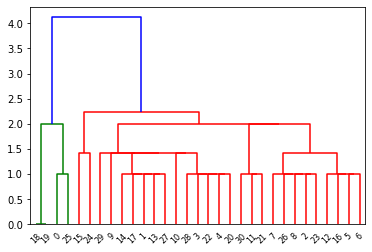

In [63]:
import scipy.cluster.hierarchy as ch
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import AgglomerativeClustering

data=samp_data

ch.dendrogram(ch.linkage(data,method='single'))



[1 3 0 3 3 0 0 0 0 3 3 0 0 3 3 2 0 3 1 1 3 0 3 0 2 1 0 3 3 3 0]


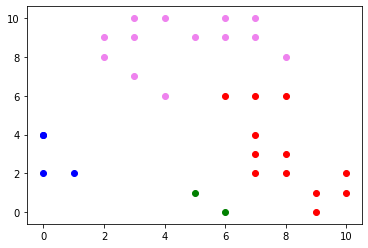

In [78]:

mod=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='single')
mod.fit(samp_data)
labels=mod.labels_
print(labels)
plt.scatter(data[labels==0,0],data[labels==0,1],color='red')
plt.scatter(data[labels==1,0],data[labels==1,1],color='blue')
plt.scatter(data[labels==2,0],data[labels==2,1],color='green')
plt.scatter(data[labels==3,0],data[labels==3,1],color='violet')
plt.scatter(data[labels==4,0],data[labels==4,1],color='purple')
plt.scatter(data[labels==5,0],data[labels==5,1],color='cyan')


### histogram assignment

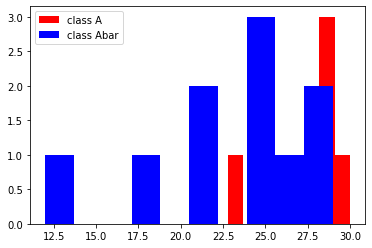

In [5]:
a=[23,26,28,29,29,29,30,25,25,21]
a1=[12,18,22,22,25,25,25,26,28,29]

plt.hist(a,color='red',label="class A")
plt.hist(a1,color='blue',label="class Abar")
plt.legend()

Text(0, 0.5, 'p(err|b)')

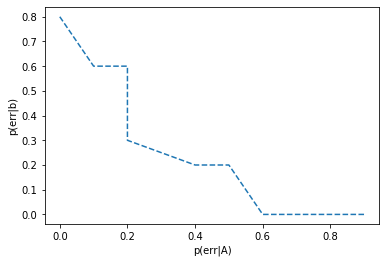

In [51]:
aerr=[0,0.1,0.1,0.2,0.2,0.4,0.5,0.5,0.6,0.9]
berr=[0.8,0.6,0.6,0.6,0.3,0.2,0.2,0.2,0,0]
plt.plot(aerr,berr,'--')
plt.xlabel("p(err|A)")
plt.ylabel("p(err|b)")

In [45]:
b=30
s=[i for i in a if i<b]
s1=[i for i in a1 if i>b]

print(len(s),len(s1))
print(s,s1)

9 0
[23, 26, 28, 29, 29, 29, 25, 25, 21] []


## k-means manual

In [2]:
MAX_iterations=9
def stopconditions(oc,ce,iterations):
    if iterations>MAX_iterations: return True
    return np.array_equal(oc,ce)

In [3]:
from random import seed
from random import randint
import numpy as np

def getRandomCentroids(k):
    seed(1)
    samp_data=np.array([[1,2]])
    # generate some integers
    for _ in range(k):
        value1 = randint(0, 7)
        value2 = randint(0, 7)
        temp=np.array([[value1,value2]])
        samp_data=np.concatenate((samp_data,temp))
    samp_data=np.delete(samp_data,0,0)
    return samp_data
    
    
    

In [4]:
def ecludian(x1,y1,x2,y2):
    return(((x1-x2)**2+(y1-y2)**2)**(1/2))

def getLabels(data,centroids):
    labels=np.array([-1])
    
    for j in range(len(data)):
        temp=[]
        for i in range(len(centroids)):
            temp.append(ecludian(centroids[i][0],centroids[i][1],data[j][0],data[j][1]))
        labels=np.concatenate((labels, np.array([temp.index(min(temp))]) ))
    labels=np.delete(labels,0)
    return(labels)
        
    
    
    

In [5]:

def getIndexPositions(Elements, key):
    indexPosList = []
    indexPos = 0
    while True:
        try:
            indexPos = Elements.index(key, indexPos)
            indexPosList.append(indexPos)
            indexPos += 1
        except ValueError as e:
            break
 
    return indexPosList

In [6]:
def getCentroids(data,labels,k):
    
    centroid=np.array([[0,0]])
    for i in range(k):
        ind=getIndexPositions(labels,i)
        temp=np.array([[0,0]])
        for j in ind:
            temp=np.concatenate((temp,np.array([data[j]])))
        
        temp=np.delete(temp,0,0)
        addx=sum(list(temp[:,0]))/len(temp)
        addy=sum(list(temp[:,1]))/len(temp)
        centroid=np.concatenate((centroid,np.array([[addx,addy]])))                         
    centroid=np.delete(centroid,0,0)
    return(centroid)
                       
            
    
    

In [7]:
def kmeans(dataSet, k):

    # Initialize centroids randomly
    centroids = getRandomCentroids(k)
    
    # Initialize book keeping vars.
    iterations = 0
    oldCentroids = None
    
    while not stopconditions(oldCentroids, centroids, iterations):
        oldCentroids = centroids
        iterations += 1
        labels = getLabels(dataSet, centroids)
        print('labels=',labels)
        print('centroids=',centroids)
        centroids = getCentroids(dataSet, list(labels), k)
        print(iterations)
        
    # We can get the labels too by calling getLabels(dataSet, centroids)
    return centroids

In [8]:
kmeans(np.array([[1,1],[1,2],[2,2],[6,2],[7,2],[6,6],[7,6],[3,4]]),3)

labels= [0 0 0 1 1 2 2 0]
centroids= [[2 1]
 [4 1]
 [7 7]]
1
labels= [0 0 0 1 1 2 2 0]
centroids= [[1.75 2.25]
 [6.5  2.  ]
 [6.5  6.  ]]
2


array([[1.75, 2.25],
       [6.5 , 2.  ],
       [6.5 , 6.  ]])